In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32)
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.7637 - loss: 0.6641
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8774 - loss: 0.3466
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8980 - loss: 0.2858
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9044 - loss: 0.2605
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9142 - loss: 0.2362
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8960 - loss: 0.3008
Test accuracy: 0.8950999975204468


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true_classes, y_pred_classes)
cm = confusion_matrix(y_true_classes, y_pred_classes)
cr=classification_report(y_true_classes,y_pred_classes)
print(cr)

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.82      0.85      1000
           3       0.86      0.93      0.89      1000
           4       0.86      0.81      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.65      0.79      0.71      1000
           7       0.95      0.96      0.96      1000
           8       0.99      0.94      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

F1 Score: 0.8966458262596403
Accuracy: 0.8951
Confusion Matrix:
 [[775   1  16  44   4   1 156   0   3   0]
 [  2 979   0  16   2   0   1   0   0   0]
 [ 12   1 821  12  57   0  97   0   0   0]
 [  4

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


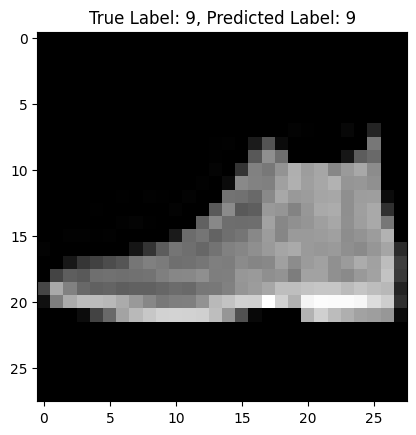

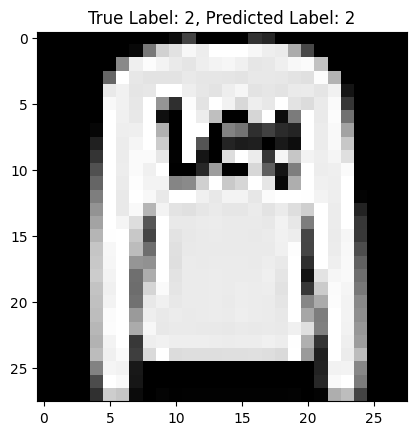

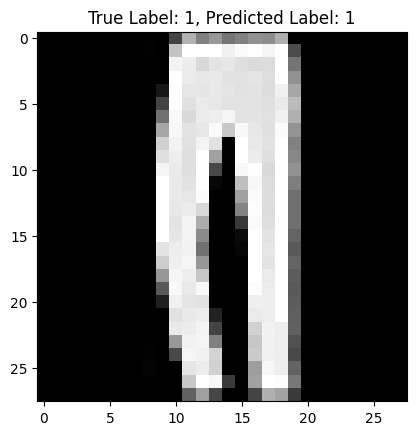

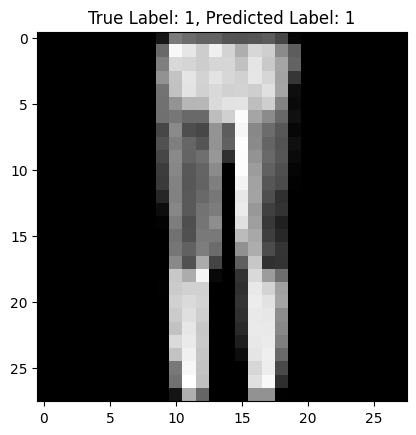

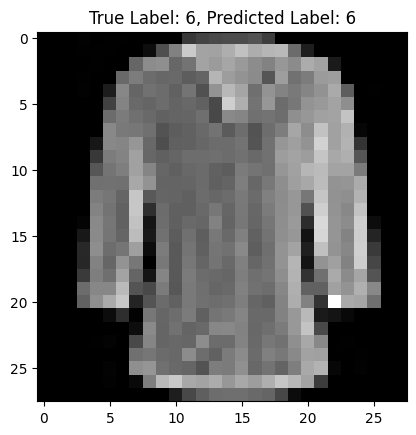

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {np.argmax(y_test[i])}, Predicted Label: {y_pred_classes[i]}")
    plt.show()

In [ ]:
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
features = feature_extractor.predict(x_test)

print("Feature Shape:", features.shape)

 17/313 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 28, 28, 1))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 28, 28, 1))
  warnings.warn(msg)


Feature Shape: (10000, 1600)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128
IS_LOCAL = False
import os
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
       x_train, y_train, test_size=0.3, random_state=42
   )

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten the images
X_test_flat = X_test.reshape(X_test.shape[0], -1)
train_data = pd.DataFrame(np.column_stack([X_train_flat, y_train]))
test_data = pd.DataFrame(np.column_stack([X_test_flat, y_test]))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 109,  90,
         67,  95,  99,  89,  82,  61,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 152, 233, 244,
        226, 240, 239, 199, 135, 104,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 212, 190, 164,
        188, 135, 164, 164, 126,  91,  23,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 240, 168, 170,
        183, 170, 163, 152, 158, 143,  56,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  16, 214, 163, 173,
        192, 220, 177, 154, 133, 112,  54,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 213, 153, 183,
        206, 209, 199, 181, 141, 106,  55,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 228, 180, 190,
        214, 212, 216, 209, 139, 119,  51,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 226, 158, 146,
        170, 255, 227, 214, 146, 115,  76,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 223, 163, 161,
        181, 192, 255, 207, 146, 120,  43,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 219, 159, 159,
        209,   0, 219, 218, 142, 131,  42,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 102, 216, 155, 154,
        204,   0, 167, 213, 136, 131,  22,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97, 210, 143, 174,
        151,   0, 122, 242, 113, 129,  18,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 207, 143, 184,
         76,   0, 110, 203, 109, 138,  36,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100, 192, 142, 187,
         44,   0, 103, 206, 104, 138,  42,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 120, 164, 152, 199,
         28,   0,  75, 204,  95, 131,  61,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 120, 153, 162, 187,
          0,   0,  28, 204, 100, 116,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 143, 173, 141,
          0,   0,   0, 202, 116, 122,  15,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 120, 152, 169, 152,
          0,   0,   0, 221, 158, 128,  41,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 181, 171, 188,
          0,   0,   0, 211, 153, 139,  22,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  66, 197, 179, 197,
          0,   0,   0, 236, 177, 155,  40,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 243, 177, 217,
          2,   0,   0, 187, 198, 183,  23,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 243, 185, 185,
         25,   0,   0, 190, 212, 177,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 206, 194, 180,
         21,   0,   0, 204, 212, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168, 210, 181,
          7,   0,   0, 197, 206, 183,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         79, 120, 127, 107,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 111,
         99,   0,   0, 115,  72,   0,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  64, 126,
          0,   1,   0,   0, 128,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0, 146,   3,
          0,   0,   3,   0, 107,  14,   0,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  27, 123,   0,
          4,   0,   6,   0,  92,  56,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  82,  99,   0,
          7,   0,   4,   0,  77,  89,   0,   5,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,   0, 116,  56,   0,
          4,   0,   2,   0,  15, 148,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0, 165,   0,   0,
          1,   0,   0,   0,   0, 156,   5,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,   9, 147,   0,   0,
          1,   0,   0,   2,   0, 157,  59,   0,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 148,   0,   0,
          0,   0,   1,   0,   0,  48,  28,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 213,  70,   0,  26,
          0,   0,   0,   0,   0,  88, 167,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  39, 202, 196, 209, 241,
        126,  12,  84, 131, 202, 202, 204,  11,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113, 202, 219, 204, 188,
        220, 213, 216, 218, 208, 184, 213,  85,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 205, 221, 157, 144,
        212, 201, 191, 210, 197, 188, 217, 158,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 226, 213, 194, 153, 167,
        202, 210, 196, 204, 198, 182, 219, 215,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 114, 241, 210, 161, 195, 196,
        185, 179, 186, 200, 141, 154, 210, 248,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 165, 241, 180, 168, 175, 168,
        162, 161, 170, 174, 145, 170, 200, 249,  36,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 191, 210, 144, 165, 171, 176,
        172, 170, 182, 169, 160, 189, 198, 240,  74,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 168, 211, 157, 164, 176, 172,
        170, 182, 190, 160, 157, 192, 195, 240,  93,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 148, 219, 162, 172, 177, 178,
        175, 195, 188, 156, 160, 192, 192, 239, 111,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 151, 225, 156, 159, 184, 181,
        179, 206, 187, 158, 171, 195, 189, 235, 137,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 161, 228, 177, 160, 182, 176,
        177, 209, 188, 165, 177, 190, 190, 226, 157,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175, 223, 194, 186, 178, 171,
        178, 209, 196, 170, 180, 191, 190, 217, 164,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 164, 205, 186, 200, 197, 194,
        194, 205, 197, 184, 181, 188, 200, 222, 172,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

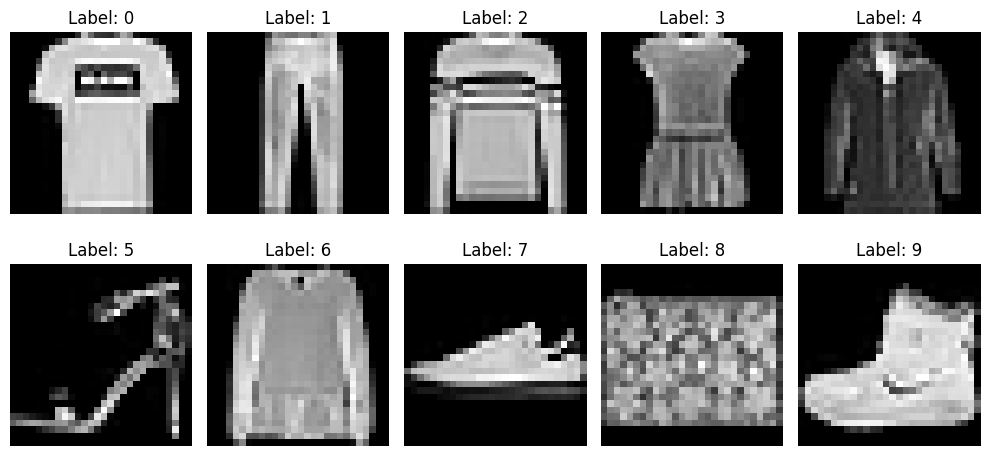

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

label_indices = {}

for i in range(len(x_train)):
    label = np.argmax(y_train[i])
    if label not in label_indices:
        label_indices[label] = i
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for label, index in label_indices.items():
    ax = axes.flat[label]
    ax.imshow(x_train[index].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.tight_layout()
plt.show()